In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Aadil Shekh\Desktop\Data\hotel_bookings 2.csv")
df.shape

(119390, 32)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df['is_canceled'].unique() # 1 shows for cancellation
                           # 0 shows for non cancellaton

array([0, 1], dtype=int64)

In [5]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], dayfirst=True)

In [6]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [7]:
for i in df.describe(include='object').columns:
    print(i)
    print(df[i].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [8]:
df.drop(columns=['company','agent'],axis=0, inplace=True)
df.dropna(subset=['country','children'],inplace=True)

In [9]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [10]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


<Axes: >

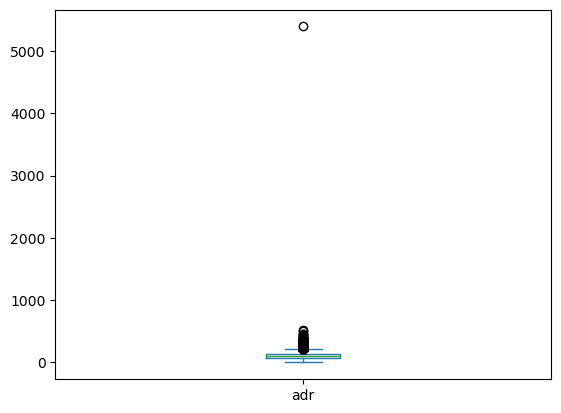

In [11]:
df['adr'].plot(kind='box')

In [12]:
df=df[df['adr']<5000]

In [13]:
cancelled_perc= df['is_canceled'].value_counts(normalize=True)
cancelled_perc

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64

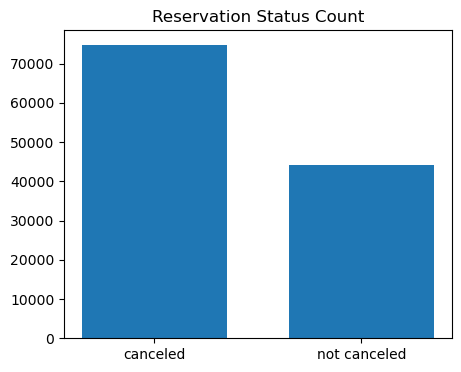

In [14]:
plt.figure(figsize=(5,4))
plt.bar(['canceled','not canceled'],df['is_canceled'].value_counts(),width=0.7)
plt.title('Reservation Status Count')
plt.show()

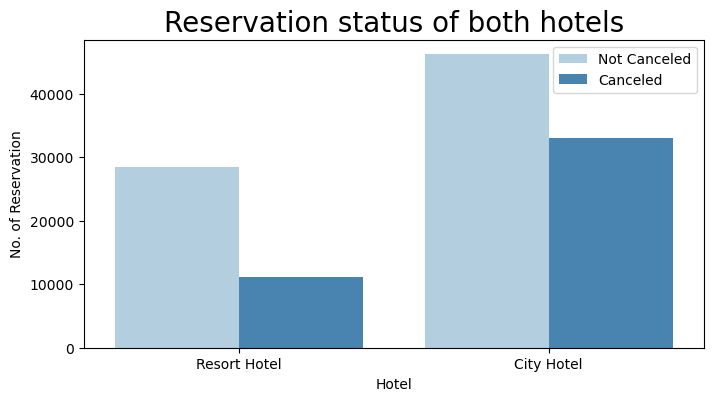

In [15]:
plt.figure(figsize=(8,4))
sns.countplot(x='hotel',hue='is_canceled',data=df, palette='Blues')
plt.title('Reservation status of both hotels', size= 20)
plt.xlabel('Hotel')
plt.ylabel('No. of Reservation')
plt.legend(['Not Canceled','Canceled'])
plt.show()

In [16]:
Resort_Hotels=df[df['hotel']=='Resort Hotel']
Resort_Hotels['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [17]:
City_Hotels=df[df['hotel']=='City Hotel']
City_Hotels['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [18]:
Resort_Hotels=Resort_Hotels.groupby('reservation_status_date')[['adr']].mean()
City_Hotels=City_Hotels.groupby('reservation_status_date')[['adr']].mean()

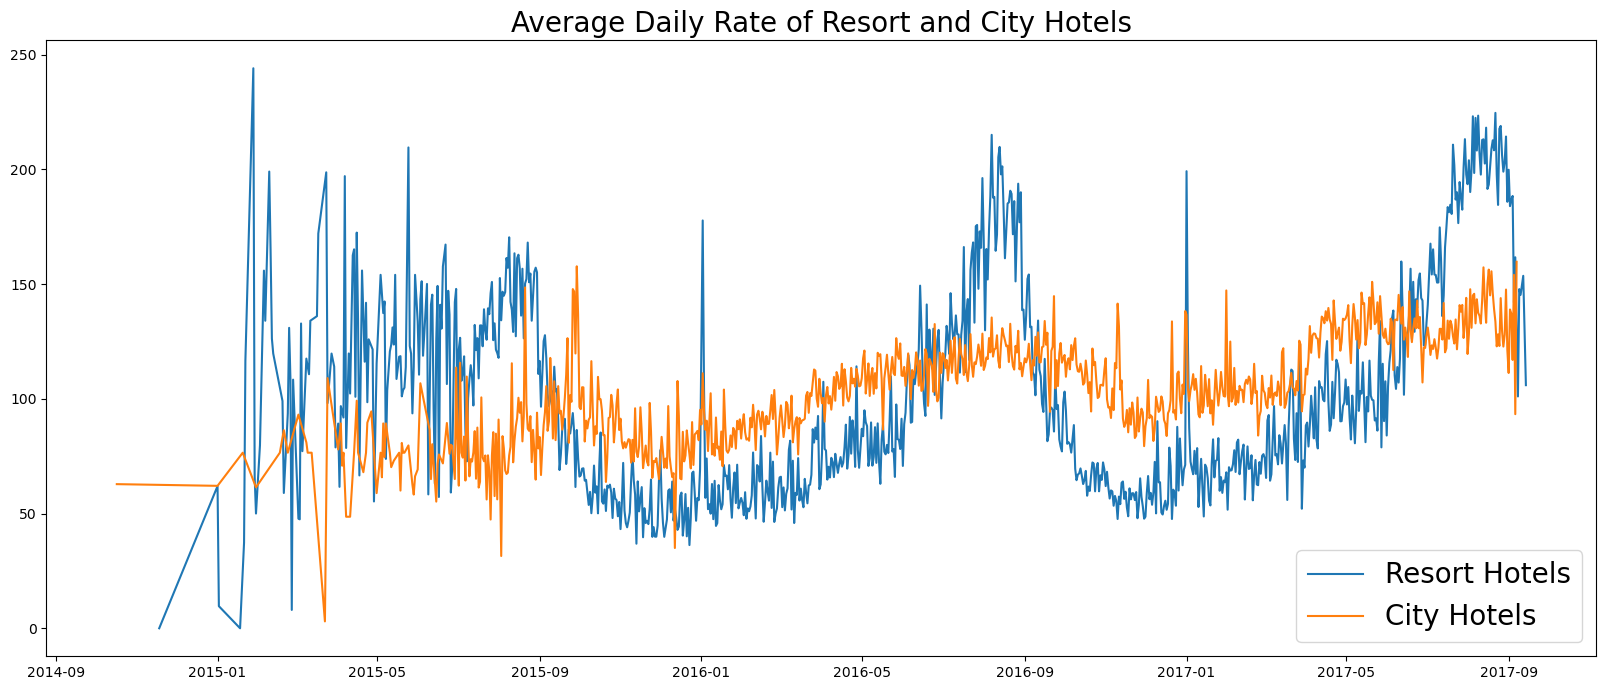

In [19]:
plt.figure(figsize=(20,8))
plt.title('Average Daily Rate of Resort and City Hotels' ,fontsize=20)
plt.plot(Resort_Hotels.index,Resort_Hotels['adr'], label='Resort Hotels')
plt.plot(City_Hotels.index,City_Hotels['adr'], label='City Hotels')
plt.legend(fontsize=20)
plt.show()


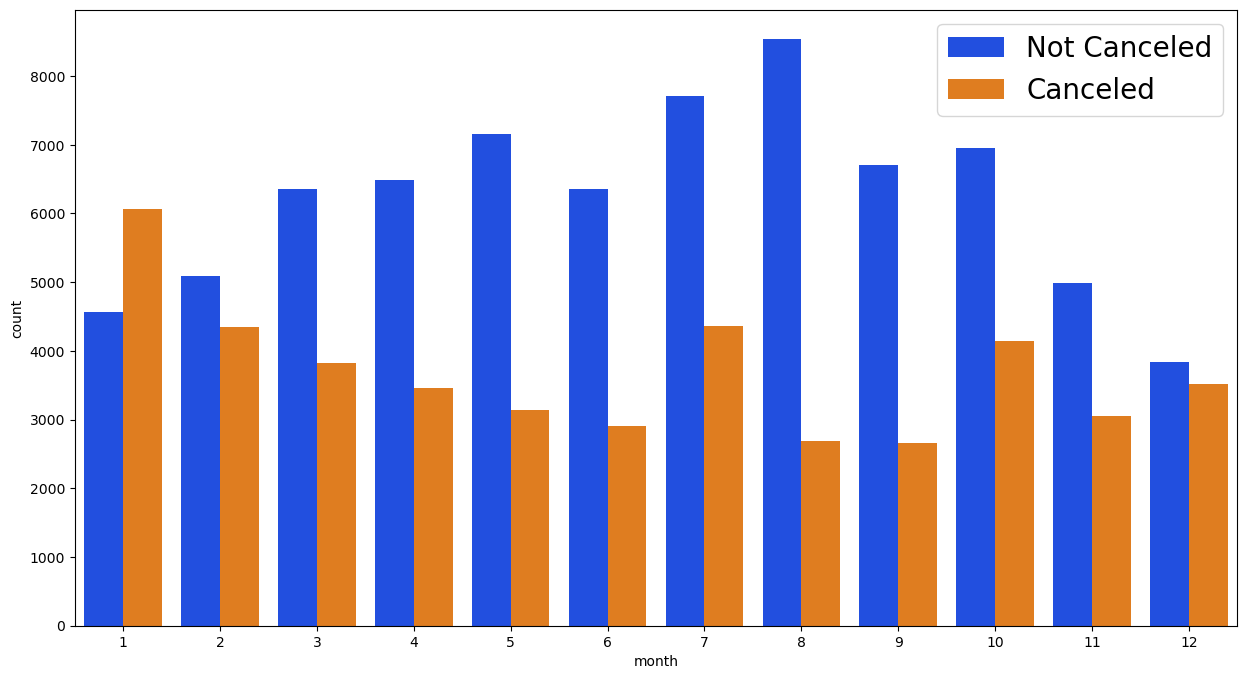

In [20]:
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(15,8))
sns.countplot(x='month', hue='is_canceled', data=df,palette='bright')
plt.legend(['Not Canceled','Canceled'],fontsize=20)
plt.show()

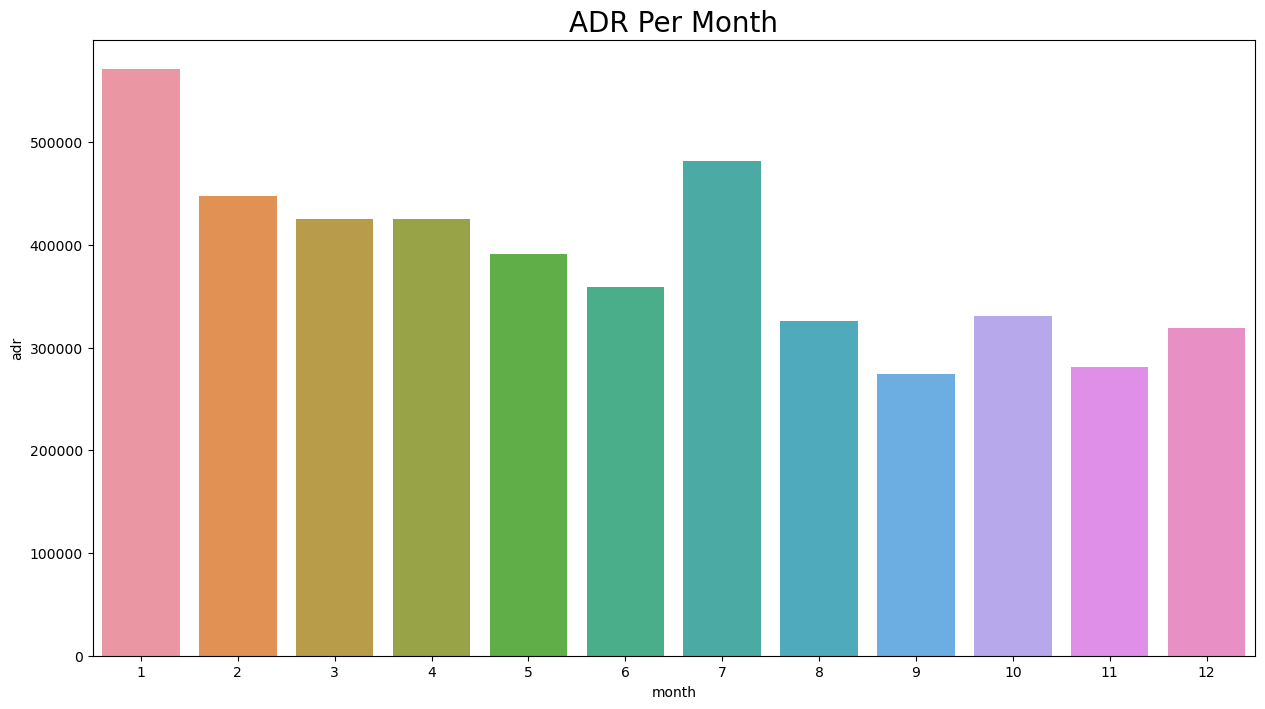

In [21]:
df1=df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x='month',y='adr',data=df1)
plt.title('ADR Per Month', fontsize=20)
plt.show()

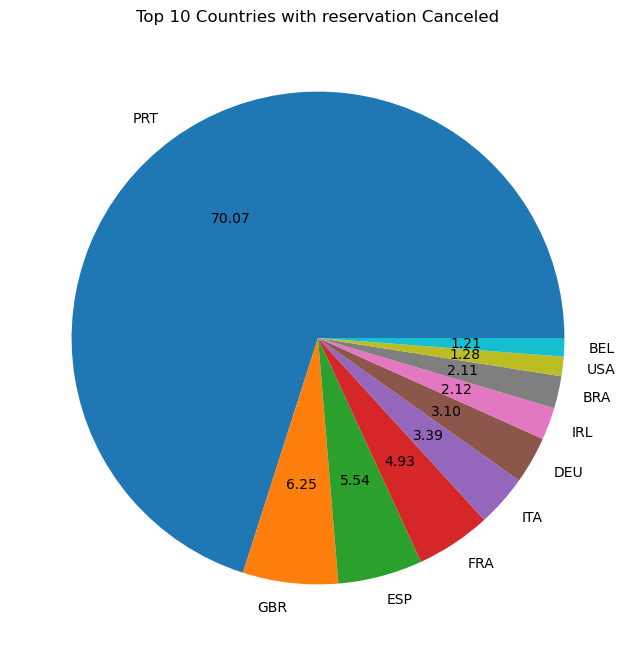

In [22]:
cancelled_data=df[df['is_canceled']==1] 
top_10_countries=cancelled_data['country'].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.title('Top 10 Countries with reservation Canceled')
plt.pie(top_10_countries,autopct='%.2f',labels=top_10_countries.index)
plt.show()

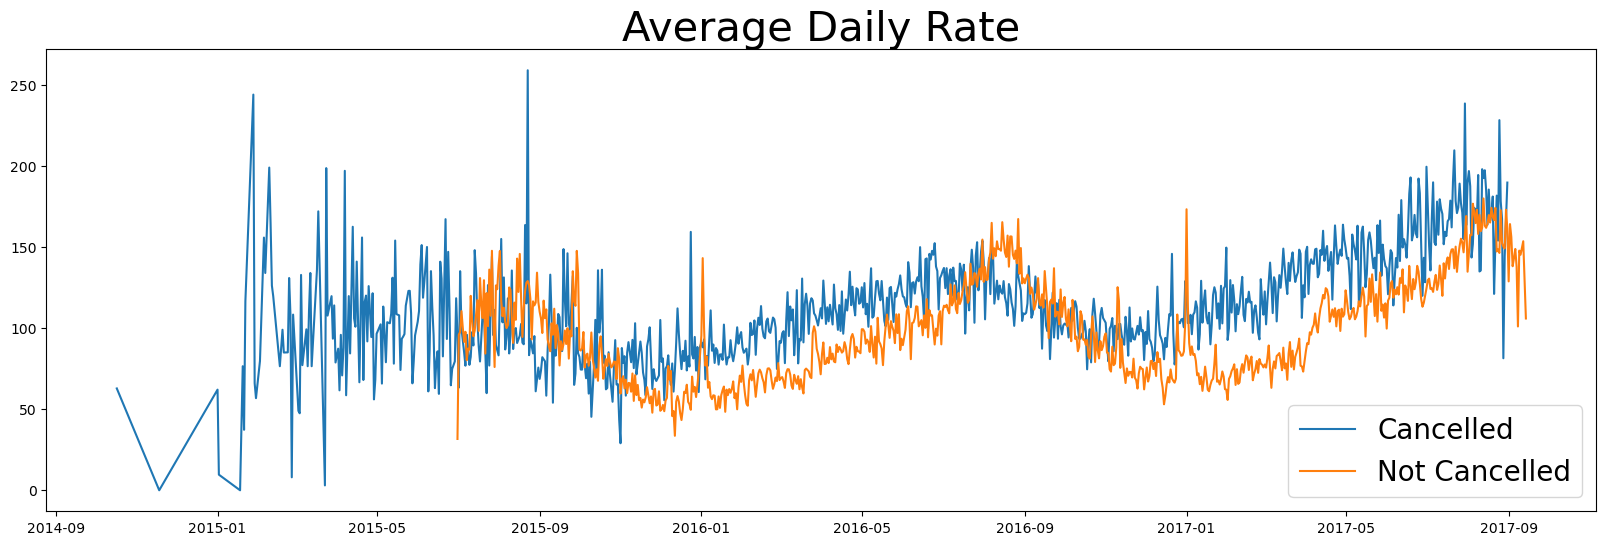

In [23]:
cancelled_data_adr=cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_data_adr.reset_index(inplace=True)
cancelled_data_adr.sort_values('reservation_status_date',inplace=True)

not_cancelled_data=df[df['is_canceled']==0]
not_cancelled_data_adr=not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_data_adr.reset_index(inplace=True)
not_cancelled_data_adr.sort_values('reservation_status_date',inplace=True)

plt.figure(figsize=(20,6))
plt.title('Average Daily Rate',fontsize=30)
plt.plot(cancelled_data_adr['reservation_status_date'],cancelled_data_adr['adr'],label='Cancelled')
plt.plot(not_cancelled_data_adr['reservation_status_date'],not_cancelled_data_adr['adr'],label='Not Cancelled')
plt.legend(fontsize=20)
plt.show()

In [24]:
cancelled_data_adr=cancelled_data_adr[(cancelled_data_adr['reservation_status_date']>'2016') & (cancelled_data_adr['reservation_status_date']<'2018')]
not_cancelled_data_adr=not_cancelled_data_adr[(not_cancelled_data_adr['reservation_status_date']>'2016') & (not_cancelled_data_adr['reservation_status_date']<'2018')]

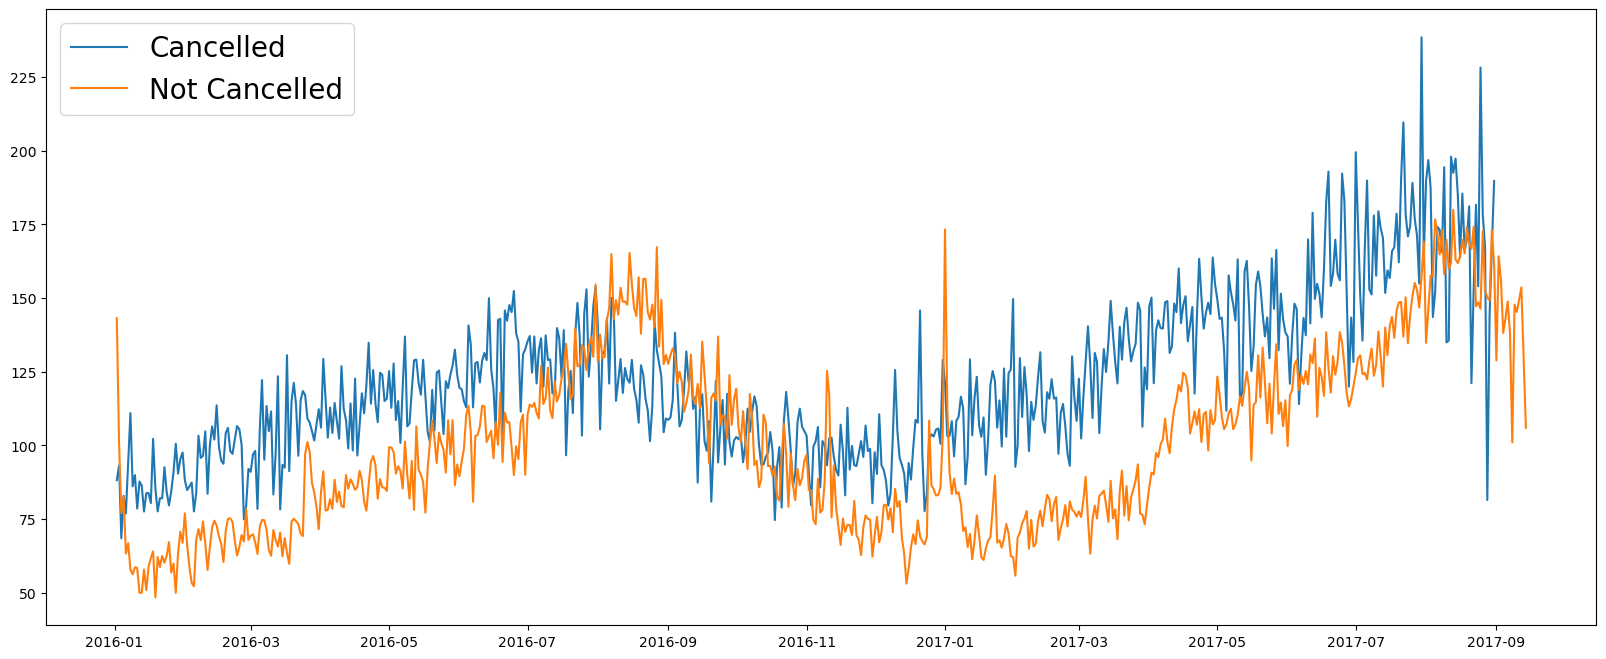

In [28]:
plt.figure(figsize=(20,8))
plt.plot(cancelled_data_adr['reservation_status_date'],cancelled_data_adr['adr'],label='Cancelled')
plt.plot(not_cancelled_data_adr['reservation_status_date'],not_cancelled_data_adr['adr'],label='Not Cancelled')
plt.legend(fontsize=20)
plt.show()